1. **What is unsupervised learning in the context of machine learning?**

Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. The algorithm tries to group or organize data based on similarities without prior training labels.

2. **How does K-Means clustering algorithm work?**

K-Means partitions data into K clusters by:

Randomly initializing K centroids.

Assigning each point to the nearest centroid.

Recomputing centroids as the mean of points in each cluster.

Repeating steps 2–3 until convergence.

3. **Explain the concept of a dendrogram in hierarchical clustering**.

A dendrogram is a tree-like diagram that shows the arrangement of clusters created by hierarchical clustering. It visualizes how clusters are merged or split at various distances.

4. **What is the main difference between K-Means and Hierarchical Clustering?**

K-Means requires specifying the number of clusters in advance and uses iterative updates.

Hierarchical Clustering builds a tree of clusters without needing the number of clusters beforehand.

5. **What are the advantages of DBSCAN over K-Means?**

Can detect clusters of arbitrary shape.

Doesn’t require specifying number of clusters.

Can identify outliers (noise).

Robust to varying cluster densities.

6. **When would you use Silhouette Score in clustering?**

Silhouette Score measures how similar a point is to its own cluster versus other clusters. It's used to evaluate the quality of clustering and determine the optimal number of clusters.

7. **What are the limitations of Hierarchical Clustering?**

Computationally expensive (O(n²)).

Not scalable to large datasets.

Sensitive to noise and outliers.

Once a merge/split is done, it cannot be undone.

8. **Why is feature scaling important in clustering algorithms like K-Means?**

Clustering algorithms use distance metrics (e.g., Euclidean). Feature scaling ensures that all features contribute equally to the distance computation, preventing bias toward features with larger values.

9. **How does DBSCAN identify noise points?**

DBSCAN labels points as noise if they do not have enough neighbors within a specified radius (eps) and are not part of any cluster.

10. **Define inertia in the context of K-Mean**s.

Inertia is the sum of squared distances between each data point and its assigned cluster centroid. Lower inertia means tighter clusters.

11. **What is the elbow method in K-Means clustering**?

The elbow method plots inertia versus number of clusters. The 'elbow point' (where the rate of decrease sharply slows) suggests the optimal number of clusters.

12. **Describe the concept of "density" in DBSCAN**.

Density in DBSCAN refers to the number of points within a given radius (eps). High-density regions form clusters, and low-density areas are labeled as noise.

13. **Can hierarchical clustering be used on categorical data?**

Yes, but it requires appropriate distance measures (e.g., Hamming distance) or data transformation techniques (e.g., one-hot encoding).

14. **What does a negative Silhouette Score indicate?**

A negative Silhouette Score indicates that a data point is likely assigned to the wrong cluster, as it is closer to points in another cluster than its own.

15. **Explain the term "linkage criteria" in hierarchical clustering**.

Linkage criteria determine how distances between clusters are calculated. Common types include:

Single linkage: Minimum distance between points.

Complete linkage: Maximum distance.

Average linkage: Average distance.

Ward’s method: Minimizes variance within clusters.

16.**Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

K-Means assumes spherical clusters with equal size and density. It struggles with:

Uneven cluster sizes.

Non-spherical shapes.

Varying densities.
This can lead to poor assignments and incorrect number of clusters.

17. **What are the core parameters in DBSCAN, and how do they influence clustering?**

eps: Radius of neighborhood around a point.

min_samples: Minimum points required to form a dense region.
These determine how tightly packed points must be to form a cluster and affect the number of clusters and noise points detected.

18. **How does K-Means++ improve upon standard K-Means initialization?**

K-Means++ selects initial centroids that are spread out, reducing chances of poor clustering and leading to faster convergence and better accuracy.

19. **What is agglomerative clustering?**

Agglomerative clustering is a bottom-up hierarchical approach where each data point starts as its own cluster, and pairs of clusters are merged step-by-step based on linkage criteria.

**20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

Inertia only measures compactness, not separation between clusters.

Silhouette Score considers both intra-cluster similarity and inter-cluster separation, giving a more holistic evaluation of cluster quality.



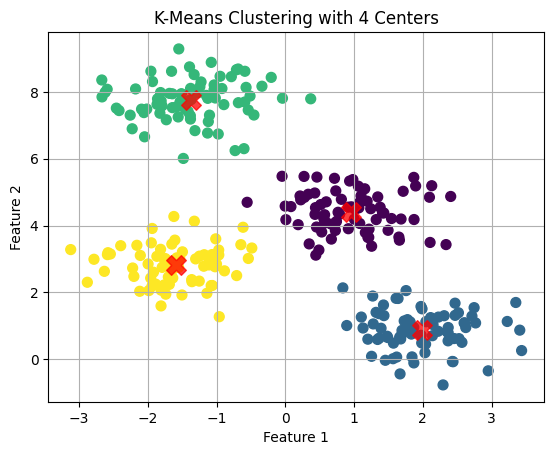

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
iris = load_iris()
X = iris.data

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


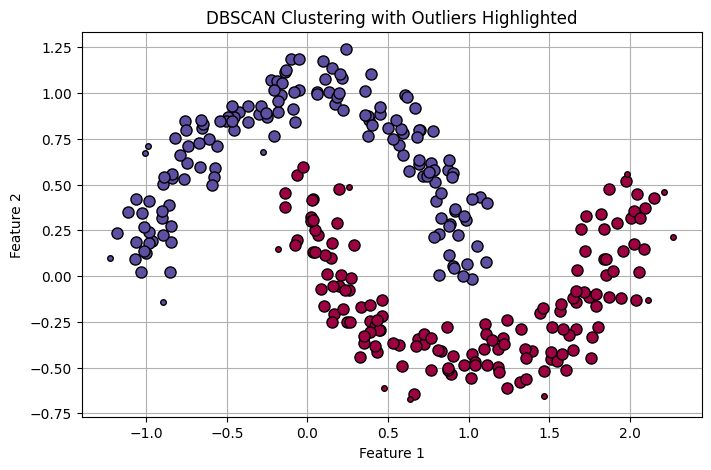

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers = labels == -1

plt.figure(figsize=(8, 5))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} samples")


Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


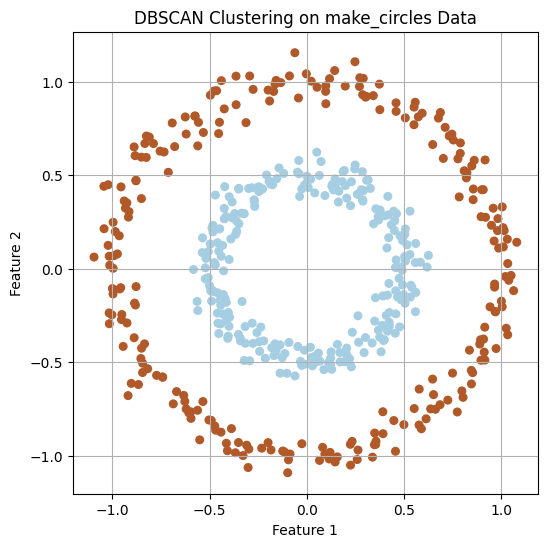

In [7]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', s=30)
plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.feature_names)
print(centroids)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.658272

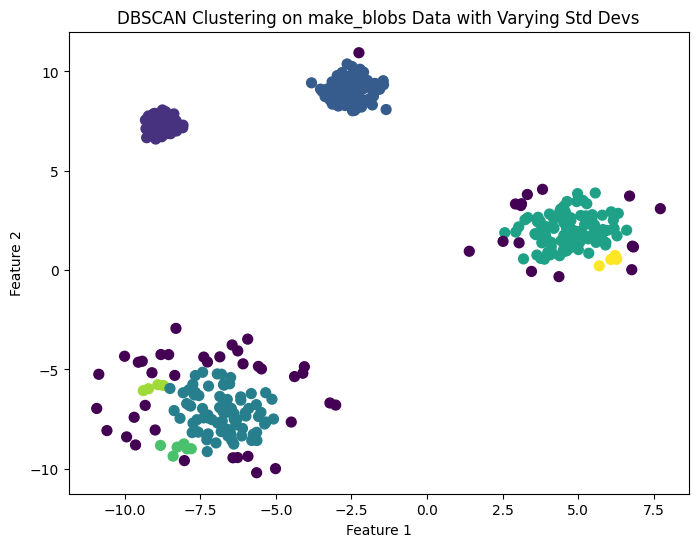

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=[0.5, 1.0, 1.5, 0.3], random_state=42)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering on make_blobs Data with Varying Std Devs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


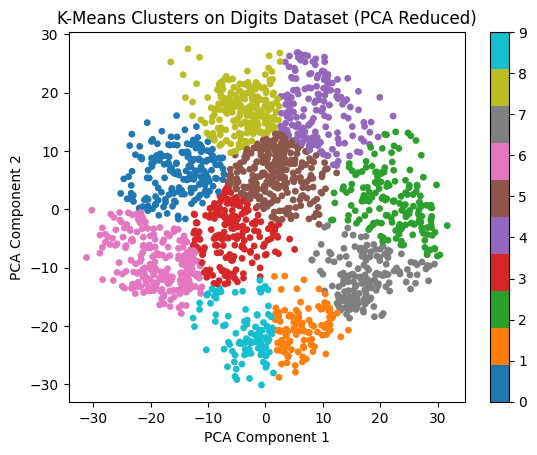

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters on Digits Dataset (PCA Reduced)')
plt.colorbar()
plt.show()


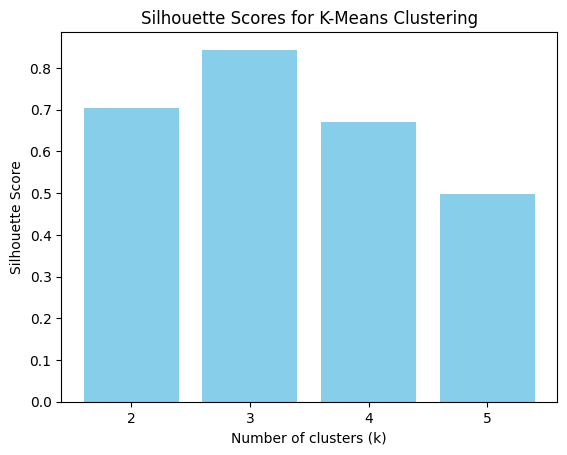

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

sil_scores = []
ks = range(2, 6)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.bar(ks, sil_scores, color='skyblue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xticks(ks)
plt.show()


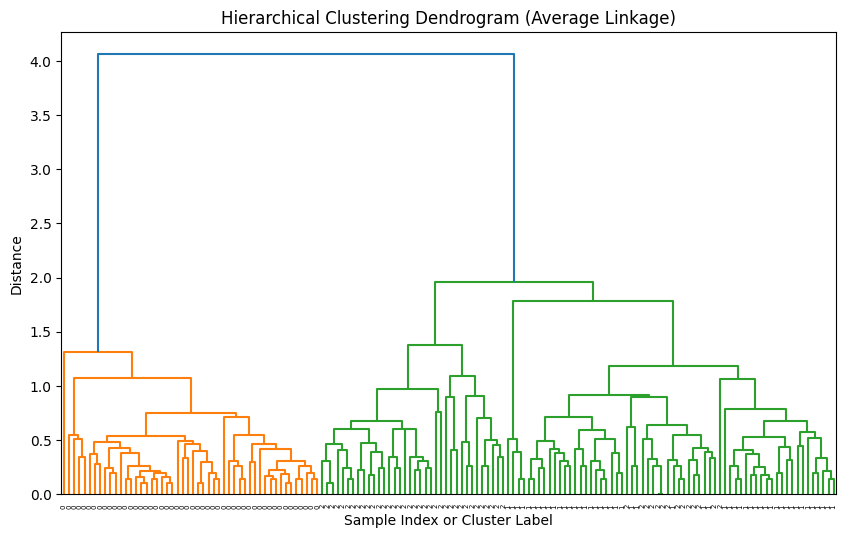

In [12]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

linked = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index or Cluster Label')
plt.ylabel('Distance')
plt.show()


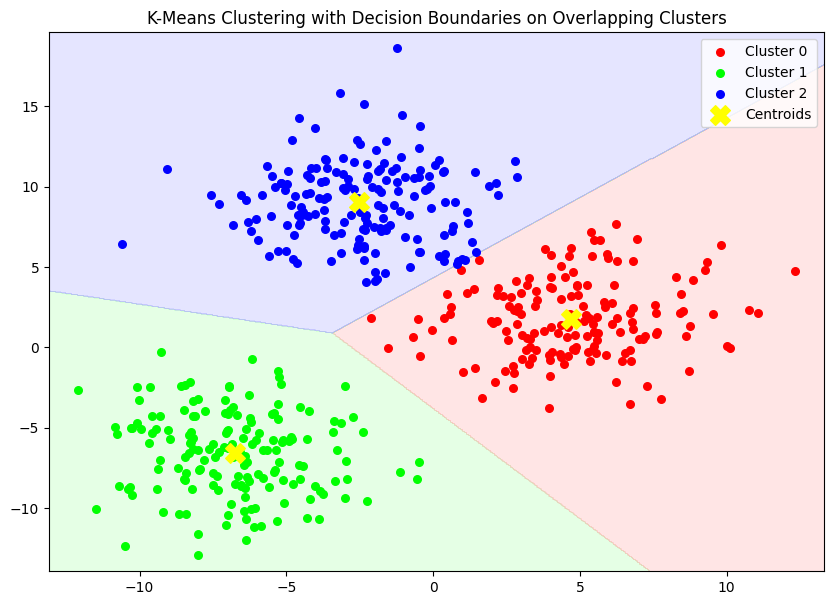

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
for i, color in enumerate(cmap_bold):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=30, color=color, label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries on Overlapping Clusters')
plt.legend()
plt.show()


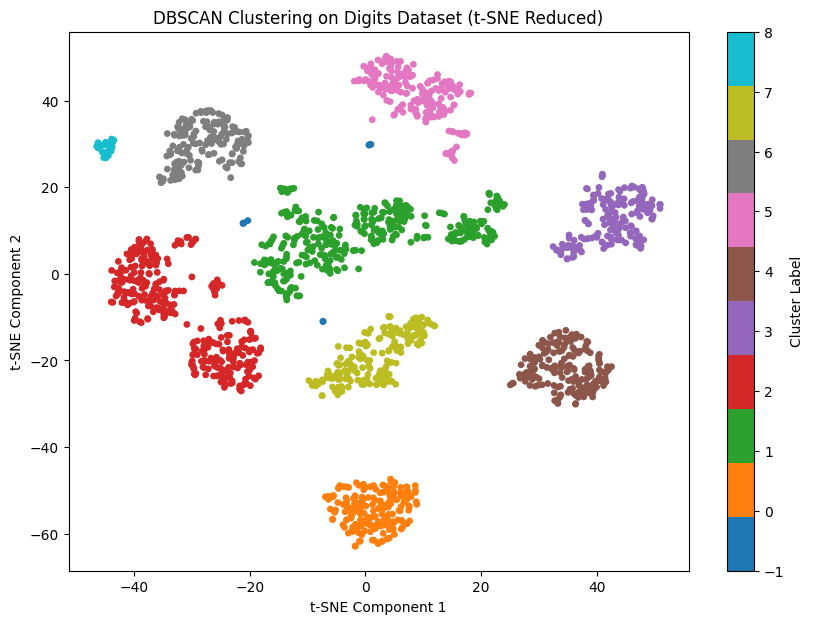

In [14]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=15)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


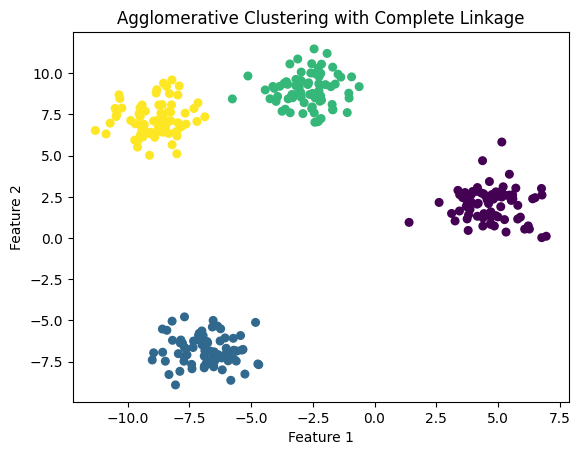

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


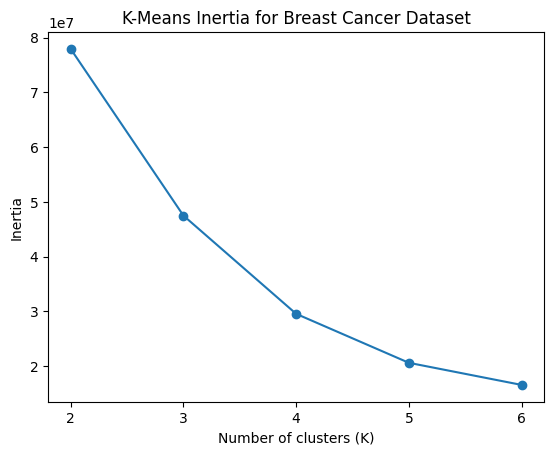

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

inertia_values = []
ks = range(2, 7)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(ks, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means Inertia for Breast Cancer Dataset')
plt.xticks(ks)
plt.show()


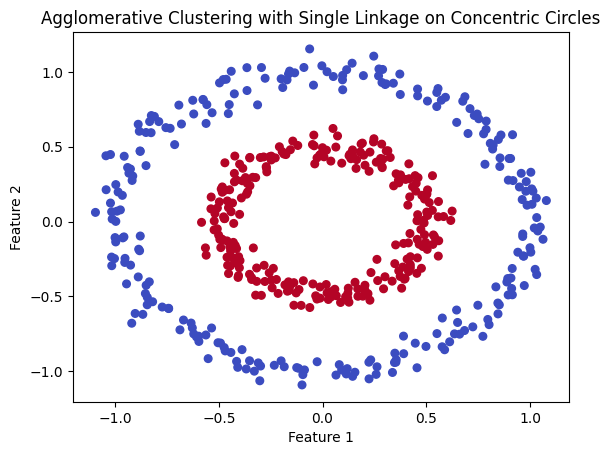

In [17]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title('Agglomerative Clustering with Single Linkage on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters


0

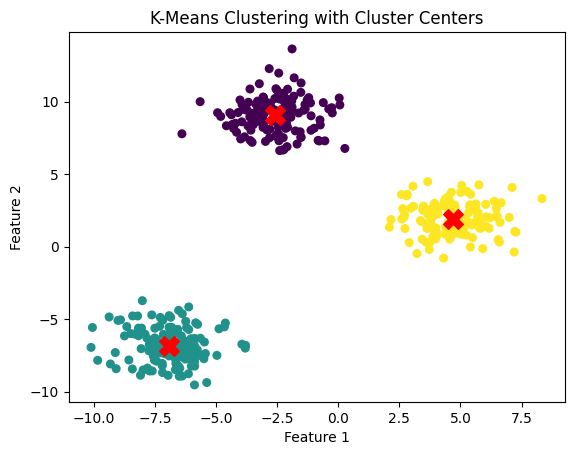

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.2, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

noise_count = np.sum(labels == -1)
print(noise_count)


17


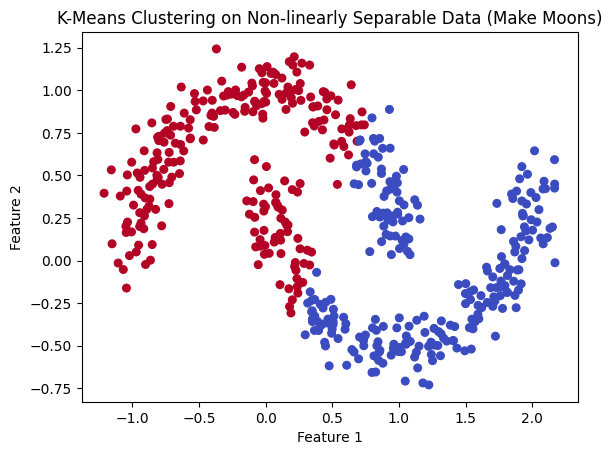

In [21]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title('K-Means Clustering on Non-linearly Separable Data (Make Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


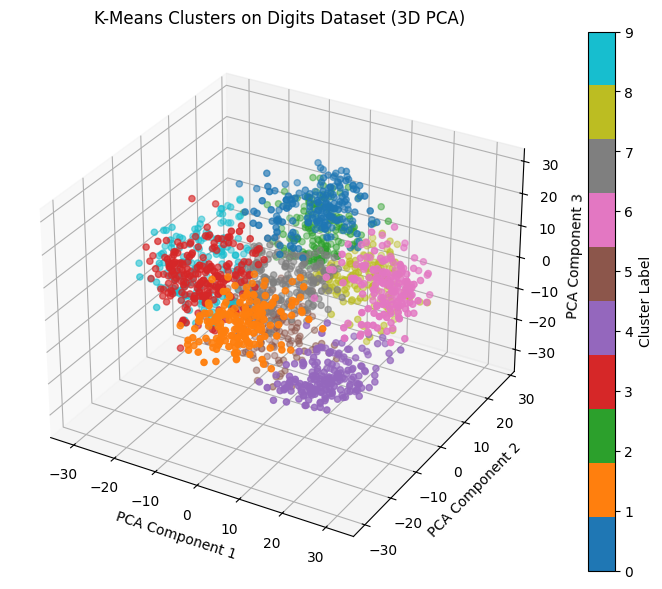

In [22]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=20)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-Means Clusters on Digits Dataset (3D PCA)')
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()


In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
score


np.float64(0.678738720085253)

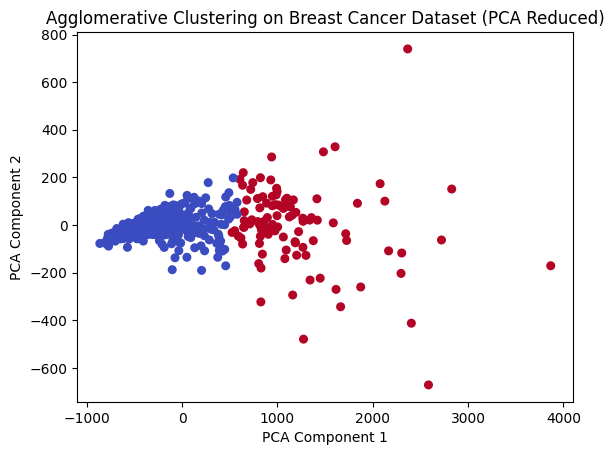

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=30)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced)')
plt.show()


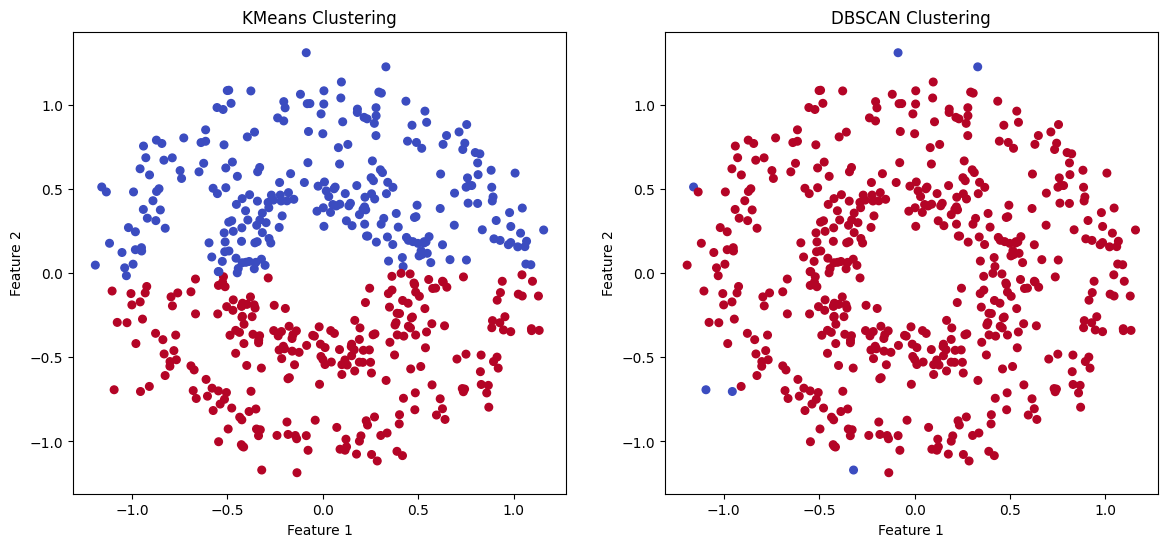

In [25]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='coolwarm', s=30)
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='coolwarm', s=30)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.show()


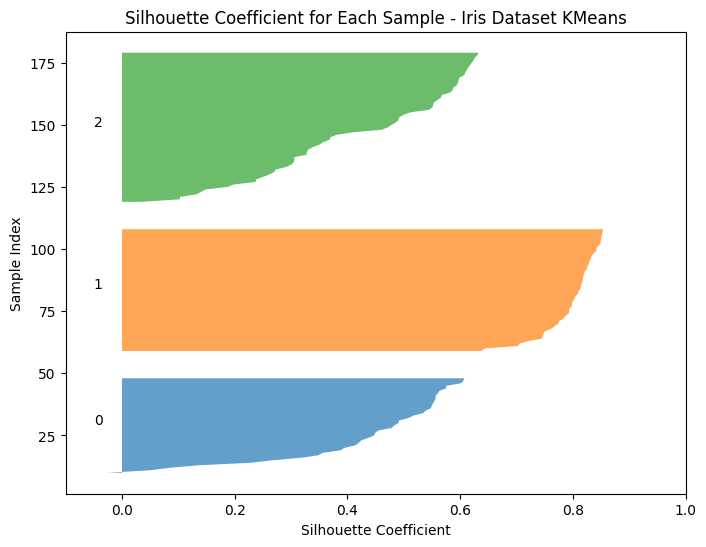

In [26]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

sil_values = silhouette_samples(X, labels)

y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(3):
    ith_cluster_sil_values = sil_values[labels == i]
    ith_cluster_sil_values.sort()
    size_cluster = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.xlabel('Silhouette Coefficient')
plt.ylabel('Sample Index')
plt.title('Silhouette Coefficient for Each Sample - Iris Dataset KMeans')
plt.xlim([-0.1, 1])
plt.show()


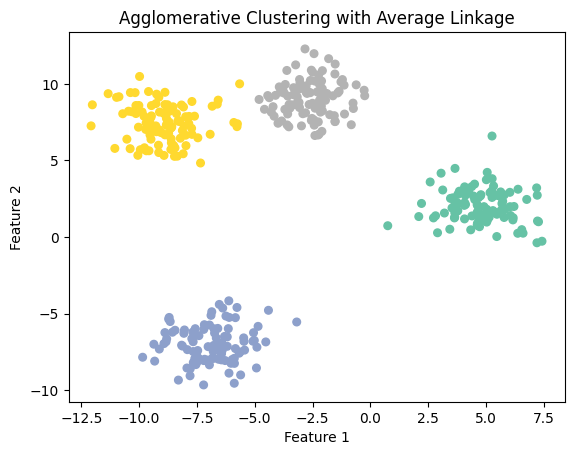

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=30)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


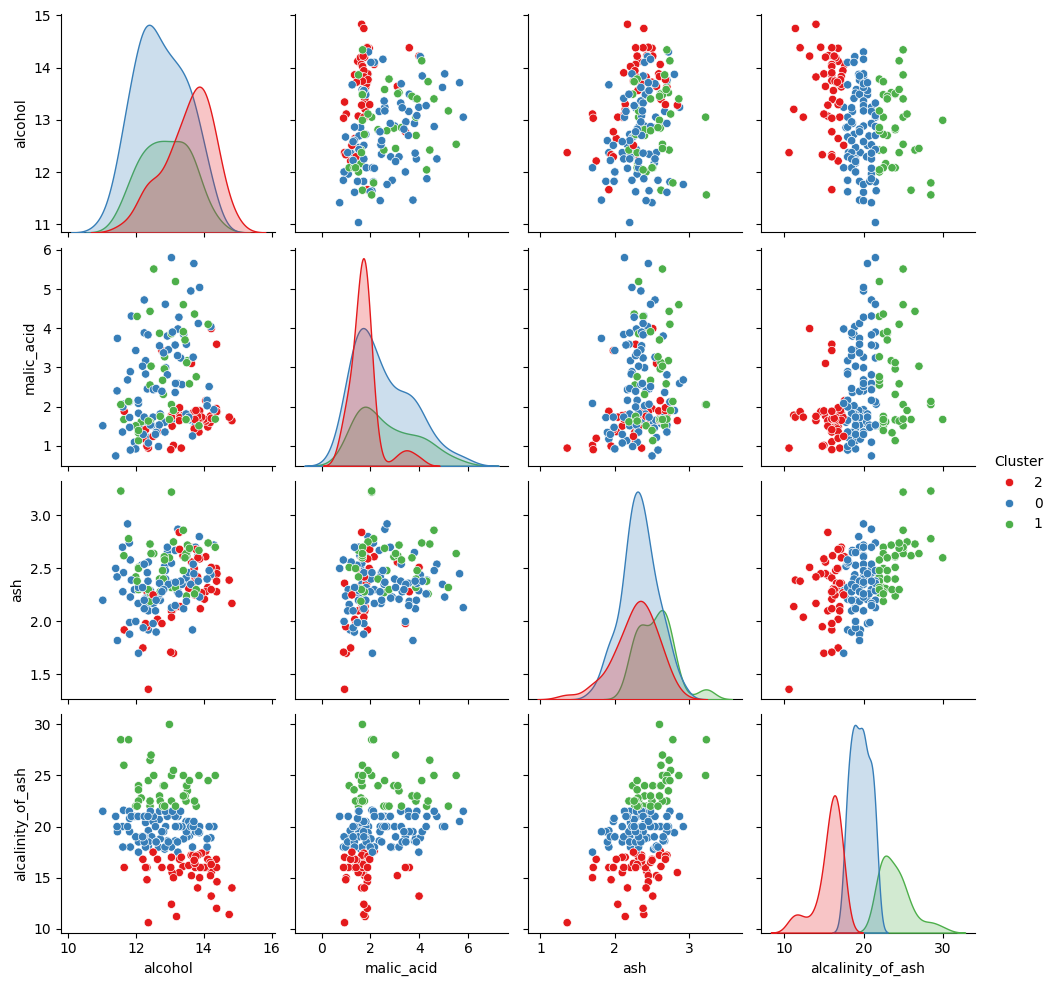

In [28]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
X = wine.data[:, :4]
feature_names = wine.feature_names[:4]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels.astype(str)

sns.pairplot(df, hue='Cluster', palette='Set1')


In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


Number of clusters: 2
Number of noise points: 25


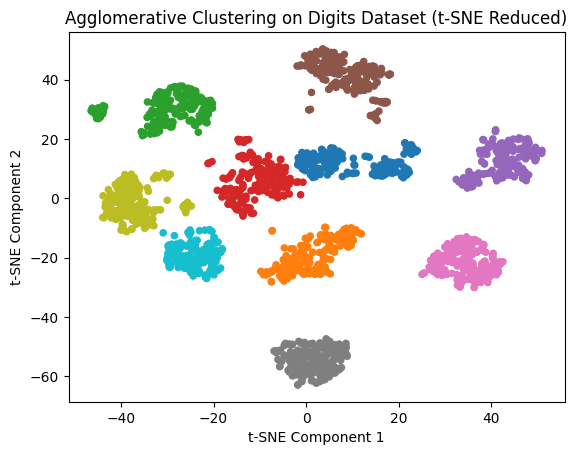

In [30]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=20)
plt.title('Agglomerative Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
